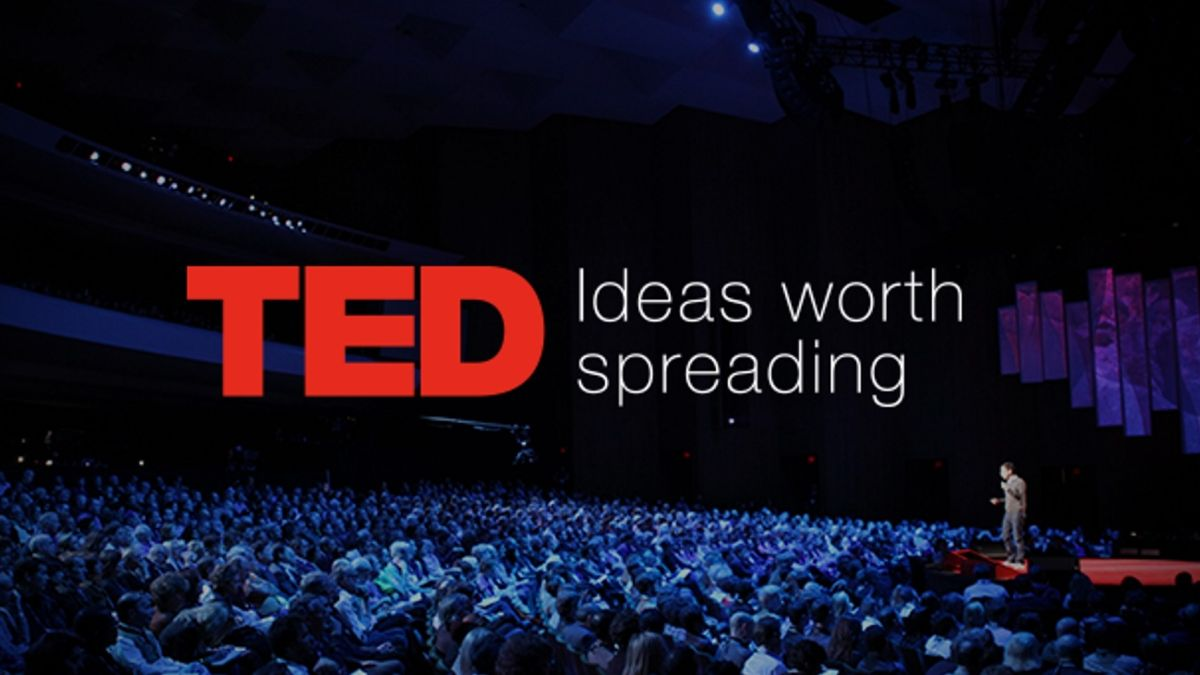

In [ ]:
import numpy as np
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TedTalks/ted_main.csv')
df1 = pd.read_csv('/content/drive/MyDrive/TedTalks/transcripts.csv')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [ ]:
df1.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


#1.TED Talk Overview

In [ ]:
df.shape

(2550, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [ ]:
df['film_date']= pd.to_datetime(df.film_date, unit='s')
df['published_date'] = pd.to_datetime(df.published_date, unit='s')
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,2017-09-20 15:02:17,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,2017-09-21 15:01:35,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,2017-07-08,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,2017-09-21 20:00:42,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United

In [ ]:
df['Year']=df['published_date'].dt.year
df['Year_Month_filming']=df['film_date'].dt.to_period('M')
df['Year_Month_publishing']=df['published_date'].dt.to_period('M')


In [ ]:
df=pd.merge(df,df1,how='inner',on='url')

In [ ]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,Year,Year_Month_filming,Year_Month_publishing,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,2006-02,2006-06,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006,2006-02,2006-06,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006,2006-02,2006-06,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006,2006-02,2006-06,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006,2006-02,2006-06,"About 10 years ago, I took on the task to teac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,2017,2017-06,2017-09,"So, Ma was trying to explain something to me a..."
2463,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,2017-09-20 15:02:17,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,2017,2017-04,2017-09,This is a picture of a sunset on Mars taken by...
2464,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,2017-09-21 15:01:35,"[{'id': 1, 'name': 'Beautiful',

In [ ]:
df['Year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017])

In [ ]:
#Check statistical data for all numerical columns
df.describe()

,comments,duration,languages,num_speaker,views,Year
count,2467.000000,2467.000000,2467.000000,2467.000000,2.467000e+03,2467.000000
mean,192.570734,821.760032,28.291447,1.027969,1.740295e+06,2012.135792
std,284.829983,334.090010,8.229757,0.208371,2.527086e+06,3.037179
min,2.000000,135.000000,1.000000,1.000000,1.558950e+05,2006.000000
25%,63.000000,582.000000,23.000000,1.000000,7.875785e+05,2010.000000
50%,117.000000,852.000000,28.000000,1.000000,1.149090e+06,2012.000000
75%,222.500000,1047.000000,33.000000,1.000000,1.736256e+06,2015.000000
max,6404.000000,3608.000000,72.000000,5.000000,4.722711e+07,2017.000000


In [ ]:
#Clean Data: Choose columns: 
#'comments','duration','film_date','languages','main_speaker','name', 'published_date','ratings', 'speaker_occupation','tags',	'title', 'views', 'Year_Month_filming', 'Year_Month_publishing','transcript'
df[['comments','duration','film_date','languages','main_speaker','name', 'published_date','ratings', 'speaker_occupation','tags',	'title', 'views', 'Year_Month_filming', 'Year_Month_publishing','Year','transcript']]

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript
0,4553,1164,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,2006-02,2006-06,2006,Good morning. How are you?(Laughter)It's been ...
1,265,977,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,2006-02,2006-06,2006,"Thank you so much, Chris. And it's truly a gre..."
2,124,1286,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,2006-02,2006-06,2006,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,1116,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,2006-02,2006-06,2006,If you're here today — and I'm very happy that...
4,593,1190,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,2006-02,2006-06,2006,"About 10 years ago, I took on the task to teac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,17,476,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,2017-09-19 20:00:16,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,450430,2017-06,2017-09,2017,"So, Ma was trying to explain something to me a..."
2463,6,290,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,2017-09-20 15:02:17,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,417470,2017-04,2017-09,2017,This is a picture of a sunset on Mars taken by...
2464,10,651,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,2017-09-21 15:01:35,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,375647,2017-04,2017-09,2017,"In my early days as a graduate student, I went..."
2465,32,1100,2017-07-08,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,2017-09-21 20:00:42,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,419309,2017-07,2017-09,2017,I took a cell phone and accidentally made myse...


#2.Defining big questions for TED Talks


1. Big Question: What factors make a good/bad quality TED Talk? 
-> Figure out criteria for good/bad quality video on Youtube: rating/view columns,comments, timestamps
2. Big Question: What topics appear the most in top good/bad quality videos?
-> Figure out top topics that cover the good/bad quality
3. Big Question: What emotional rating represents TED videos with positive and negative ratings? (Question 3)
-> Figure out top emotional ratings appearing in top good/ bad quality videos 

# 3.Clean the data for ratings

In [ ]:
#Check the element and type of column'ratings (String type)
df['ratings'][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [ ]:
#Convert the 'rating' column as JSON object into the column of each rating for 1 row (1 TED Talk)
df['ratings']=df['ratings'].str.replace("'",'"')
pd.read_json(df['ratings'][0])[['name','count']]



,name,count
0,Funny,19645
1,Beautiful,4573
2,Ingenious,6073
3,Courageous,3253
4,Longwinded,387
5,Confusing,242
6,Informative,7346
7,Fascinating,10581
8,Unconvincing,300
9,Persuasive,10704


In [ ]:
#For each talk, there are 14 ratings divided into 2 groups of positive, negative and ok
positive= ['Beautiful','Inspiring','Funny','Fascinating','Ingenious','Jaw-dropping','Courageous','Persuasive','Informative','OK']
negative=['Longwinded','Unconvincing','Confusing','Obnoxious']


In [ ]:
##Convert the 'rating' column as JSON object into the column of each rating for all TED Talks
df=df.merge(df.ratings.apply(lambda x: pd.Series(pd.read_json(x)['count'].values,index=pd.read_json(x)['name'])), 
    left_index=True, right_index=True)
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,Year,Year_Month_filming,Year_Month_publishing,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,2006-02,2006-06,Good morning. How are you?(Laughter)It's been ...,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 544}, {""i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006,2006-02,2006-06,"Thank you so much, Chris. And it's truly a gre...",544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006,2006-02,2006-06,"(Music: ""The Sound of Silence,"" Simon & Garfun...",964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006,2006-02,2006-06,If you're here today — and I'm very happy that...,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006,2006-02,2006-06,"About 10 years ago, I took on the task to teac...",1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,2017,2017-06,2017-09,"So, Ma was trying to explain something to me a...",1,21,22,24,3,2,33,8,12,24,14,0,1,27
2463,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martia

In [ ]:
#Clean the dataset by choosing specific columns as follow and create a new dataset name 'ted'
ted=df[['comments','duration','film_date','languages','main_speaker','name', 'published_date','ratings', 'speaker_occupation','tags',	'title', 'views', 'Year_Month_filming', 'Year_Month_publishing','Year','transcript', 'Funny',	'Beautiful','Ingenious',	'Courageous',	'Longwinded','Confusing','Informative','Fascinating','Unconvincing','Persuasive','Jaw-dropping','OK',	'Obnoxious','Inspiring']]
ted

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,1164,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,2006-02,2006-06,2006,Good morning. How are you?(Laughter)It's been ...,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,977,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 544}, {""i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,2006-02,2006-06,2006,"Thank you so much, Chris. And it's truly a gre...",544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,124,1286,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,2006-02,2006-06,2006,"(Music: ""The Sound of Silence,"" Simon & Garfun...",964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,200,1116,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,2006-06-27 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,2006-02,2006-06,2006,If you're here today — and I'm very happy that...,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,593,1190,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,2006-06-27 20:38:00,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,2006-02,2006-06,2006,"About 10 years ago, I took on the task to teac...",1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,17,476,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,2017-09-19 20:00:16,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 24},...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,450430,2017-06,2017-09,2017,"So, Ma was trying to explain something to me a...",1,21,22,24,3,2,33,8,12,24,14,0,1,27
2463,6,290,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,2017-09-20 15:02:17,"[{""id"": 22, ""name"": ""Fascinating"", ""count"": 32...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,417470,2017-04,2017-09,2017,This is a picture of a sunset on Mars taken by...,20,4,6,2,0,0,38,32,1,7,8,13,0,20
2464,10,651,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,2017-09-21 15:01:35,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 14}, ...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,375647,2017-04,2017-09,2017,"In my early days as a graduate student, I went...",1,14,19,2,0,5,32,24,1,3,1,4,0,30
2465,32,1100,2017-07-08,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,2017-09-21 20:00:42,"[{""id"": 11, ""name"": ""Longwinded"", ""count"": 3},...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,419309,2017-07,2017-09,2017,I took a cell phone and accidentally made myse...,63,21,37,107,3,1,75,39,6,65

In [ ]:
# 14 ratings for each clip are divided into 3 groups of positive, negative 
positive= ['Beautiful','Inspiring','Funny','Fascinating','Ingenious','Jaw-dropping','Courageous','Persuasive','Informative','OK']
negative=['Longwinded','Unconvincing','Confusing','Obnoxious']


After cleaning the data, there are 3 hypothesis for question 1 needed to be checked in the next section: 
1. Compare ratings/view columns for each video -> Criteria a good/bad/neutral video 
2. Compare the comments for each video 
3. Compare number of duration for this video 


#4.What factors make a good/bad quality TED Talk? (Question 1)

## 4.1.Compare ratings/view columns based on criteria good/bad

In [ ]:
#Create 3 new columns of positive, negative and ok based on the count number of ratings
ted['positive']=ted['Funny']+	ted['Beautiful']+ ted['Ingenious']+ ted['Courageous'] + ted['Informative'] + ted['Fascinating'] + ted['Unconvincing'] + ted['Persuasive'] + ted['Jaw-dropping']+ ted['Inspiring']+ted['OK']
ted['negative']=(ted['Longwinded']+ ted['Unconvincing']+ ted['Confusing']+ ted['Obnoxious'])*(-1)
ted['total_ratings']= ted['positive']+ (ted['negative']) 
ted


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,total_ratings
0,4553,1164,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,2006-02,2006-06,2006,Good morning. How are you?(Laughter)It's been ...,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93012,-1138,91874
1,265,977,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 544}, {""i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,2006-02,2006-06,2006,"Thank you so much, Chris. And it's truly a gre...",544,58,56,139,113,62,443,132,258,268,116,203,131,413,2630,-564,2066
2,124,1286,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,2006-02,2006-06,2006,"(Music: ""The Sound of Silence,"" Simon & Garfun...",964,60,183,45,78,27,395,166,104,230,54,146,142,230,2577,-351,2226
3,200,1116,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,2006-06-27 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,2006-02,2006-06,2006,If you're here today — and I'm very happy that...,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,3608,-156,3452
4,593,1190,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,2006-06-27 20:38:00,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,2006-02,2006-06,2006,"About 10 years ago, I took on the task to teac...",1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,25377,-310,25067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,17,476,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,2017-09-19 20:00:16,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 24},...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,450430,2017-06,2017-09,2017,"So, Ma was trying to explain something to me a...",1,21,22,24,3,2,33,8,12,24,14,0,1,27,186,-18,168
2463,6,290,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,2017-09-20 15:02:17,"[{""id"": 22, ""name"": ""Fascinating"", ""count"": 32...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,417470,2017-04,2017-09,2017,This is a picture of a sunset on Mars taken by...,20,4,6,2,0,0,38,32,1,7,8,13,0,20,151,-1,150
2464,10,651,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,2017-09-21 15:01:35,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 14}, ...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,375647,2017-04,2017-09,2017,"In my early days as a graduate student, I went...",1,14,19,2,0,5,32,24,1,3,1,4,0,30,131,-6,125
2465,32,1100,2017-07-08,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,2017-09-21 20:00:42,"[{""id"": 11, ""name"": ""Longwinded"", ""count"": 3},...",Public intellectual,"['Internet', 'TEDx', 'United States', 'comm

In [ ]:
#Like to View Rate(ted.positive/ted.views)
#Dislike to View Rate (ted.negative/ted.views)
#Create 2 news column called ratio_good/view and ratio_bad/view describing the ratio between ratings and views
ted['positive/view']=(ted['positive']/ted['views'])*100
ted['negative/view']=(ted['negative']/ted['views'])*100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#Comment to View Rate (ted.comment/ted.views)
ted['comment/views_ratio']=ted['comments']/ted['views']*100
ted

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,total_ratings,positive/view,negative/view,comment/views_ratio
0,4553,1164,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,2006-02,2006-06,2006,Good morning. How are you?(Laughter)It's been ...,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93012,-1138,91874,0.196946,-0.002410,0.009641
1,265,977,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 544}, {""i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,2006-02,2006-06,2006,"Thank you so much, Chris. And it's truly a gre...",544,58,56,139,113,62,443,132,258,268,116,203,131,413,2630,-564,2066,0.082174,-0.017622,0.008280
2,124,1286,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,2006-02,2006-06,2006,"(Music: ""The Sound of Silence,"" Simon & Garfun...",964,60,183,45,78,27,395,166,104,230,54,146,142,230,2577,-351,2226,0.157490,-0.021451,0.007578
3,200,1116,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,2006-06-27 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,2006-02,2006-06,2006,If you're here today — and I'm very happy that...,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,3608,-156,3452,0.212542,-0.009190,0.011782
4,593,1190,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,2006-06-27 20:38:00,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,2006-02,2006-06,2006,"About 10 years ago, I took on the task to teac...",1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,25377,-310,25067,0.211372,-0.002582,0.004939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,17,476,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,2017-09-19 20:00:16,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 24},...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,450430,2017-06,2017-09,2017,"So, Ma was trying to explain something to me a...",1,21,22,24,3,2,33,8,12,24,14,0,1,27,186,-18,168,0.041294,-0.003996,0.003774
2463,6,290,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,2017-09-20 15:02:17,"[{""id"": 22, ""name"": ""Fascinating"", ""count"": 32...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,417470,2017-04,2017-09,2017,This is a picture of a sunset on Mars taken by...,20,4,6,2,0,0,38,32,1,7,8,13,0,20,151,-1,150,0.036170,-0.000240,0.001437
2464,10,651,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,2017-09-21 15:01:35,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 14}, ...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,375647,2017-04,2017-09,2017,"In my early days as a graduate student, I went...",1,14,19,2,0,5,32,24,1,3,1

In [ ]:
#ted['positive/view']:
# + Bad(10-30th percentile)
# + Average(30th-60th percentile)
# + Good(60th-90th)

q1g = ted['positive/view'].quantile(0.1) # Tính Q1
q2g = ted['positive/view'].quantile(0.3) # Tính Q2 
q3g = ted['positive/view'].quantile(0.6) # Tính Q2 
q4g = ted['positive/view'].quantile(0.9) 

# ted[(ted['positive/view']>q1g) & (ted['positive/view']<q2g)].count() #Bad: 510 
# ted[(ted['positive/view']>q2g) & (ted['positive/view']<q3g)].count() #Average: 765 
good= ted[(ted['positive/view']>q3g) & (ted['positive/view']<q4g)] #Good: 765 
good

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,total_ratings,positive/view,negative/view,comment/views_ratio
0,4553,1164,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,2006-02,2006-06,2006,Good morning. How are you?(Laughter)It's been ...,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93012,-1138,91874,0.196946,-0.002410,0.009641
2,124,1286,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,2006-02,2006-06,2006,"(Music: ""The Sound of Silence,"" Simon & Garfun...",964,60,183,45,78,27,395,166,104,230,54,146,142,230,2577,-351,2226,0.157490,-0.021451,0.007578
3,200,1116,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,2006-06-27 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,2006-02,2006-06,2006,If you're here today — and I'm very happy that...,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,3608,-156,3452,0.212542,-0.009190,0.011782
4,593,1190,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,2006-06-27 20:38:00,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,2006-02,2006-06,2006,"About 10 years ago, I took on the task to teac...",1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,25377,-310,25067,0.211372,-0.002582,0.004939
6,919,992,2006-02-24,31,Julia Sweeney,Julia Sweeney: Letting go of God,2006-07-10 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 477}...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987,2006-02,2006-07,2006,"On September 10, the morning of my seventh bir...",2484,277,320,477,193,72,226,316,225,311,61,308,290,438,5443,-780,4663,0.144377,-0.020690,0.024377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,235,1072,2017-04-25,32,His Holiness Pope Francis,His Holiness Pope Francis: Why the only future...,2017-04-26 01:01:05,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 1665}...",Bishop of Rome,"['Christianity', 'children', 'climate change',...",Why the only future worth building includes ev...,2679881,2017-04,2017-04,2017,[His Holiness Pope Francis Filmed in Vatican C...,21,1665,40,659,26,33,142,359,23,544,87,45,28,2229,5814,-110,5704,0.216950,-0.004105,0.008769
2367,105,1071,2017-04-24,26,Shah Rukh Khan,"Shah Rukh Khan: Thoughts on humanity, fame and...",2017-05-12 19:44:40,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 2626}...","Actor, producer, activist","['aging', 'art', 'communication', 'dance', 'en...","Thoughts on humanity, fame and love",4642478,2017-04,2017-05,2017,"Namaskar.I'm a movie star, I'm 51 years of age...",1020,2626,157,473,31,31,241,1259,30,151,327,120,15,3984,10388,-107,10281,0.223760,-0.002305,0.002262
2373,183,898,2017-04-24,20,Rutger Bregman,Rutger Bregman: Poverty isn't a lack of charac...,2017-05-22 15:06:14,"[{""id"": 10, ""name"": ""Inspiring"", ""count"": 950}...",Historian,"['capitalism', 'economics', 'inequality', 'mon...",Poverty isn't a lack of character; it's a lack...,1419314,2017-04,2017-

In [ ]:
#ted['negative/view']:
# + Bad(10-30th percentile)
# + Average(30th-60th percentile)
# + Good(60th-90th)

q1b = ted['negative/view'].quantile(0.1) # Tính Q1
q2b = ted['negative/view'].quantile(0.3) # Tính Q2 
q3b = ted['negative/view'].quantile(0.6) # Tính Q2 
q4b = ted['negative/view'].quantile(0.9) 

bad= ted[(ted['negative/view']>q1b) & (ted['negative/view']<q2b)] #Bad: 510 
# ted[(ted['negative/view']>q2b) & (ted['negative/view']<q3b)].count() #Average: 765 
# ted[(ted['negative/view']>q3b) & (ted['negative/view']<q4b)].count() #Good: 765
bad

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,total_ratings,positive/view,negative/view,comment/views_ratio
1,265,977,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 544}, {""i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,2006-02,2006-06,2006,"Thank you so much, Chris. And it's truly a gre...",544,58,56,139,113,62,443,132,258,268,116,203,131,413,2630,-564,2066,0.082174,-0.017622,0.008280
2,124,1286,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,2006-02,2006-06,2006,"(Music: ""The Sound of Silence,"" Simon & Garfun...",964,60,183,45,78,27,395,166,104,230,54,146,142,230,2577,-351,2226,0.157490,-0.021451,0.007578
6,919,992,2006-02-24,31,Julia Sweeney,Julia Sweeney: Letting go of God,2006-07-10 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 477}...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987,2006-02,2006-07,2006,"On September 10, the morning of my seventh bir...",2484,277,320,477,193,72,226,316,225,311,61,308,290,438,5443,-780,4663,0.144377,-0.020690,0.024377
8,852,1485,2006-02-02,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,2006-07-18 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 562}...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,2567958,2006-02,2006-07,2006,It's wonderful to be back. I love this wonderf...,60,145,211,562,177,70,623,313,283,764,60,154,83,441,3616,-613,3003,0.140812,-0.023871,0.033178
14,99,1057,2006-02-23,25,Nicholas Negroponte,Nicholas Negroponte: One Laptop per Child,2006-08-01 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 83},...",Tech visionary,"['children', 'design', 'education', 'entrepren...",One Laptop per Child,358304,2006-02,2006-08,2006,I've been at MIT for 44 years. I went to TED I...,14,32,89,83,20,6,104,67,31,49,29,30,11,216,744,-68,676,0.207645,-0.018978,0.027630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,37,713,2016-10-21,15,Dan Bell,Dan Bell: Inside America's dead shopping malls,2017-03-17 15:51:46,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 83}, ...",Filmmaker,"['TEDx', 'art', 'capitalism', 'community', 'ex...",Inside America's dead shopping malls,1707855,2016-10,2017-03,2017,"In the last couple of years, I have produced w...",261,83,56,32,81,52,114,108,44,11,24,113,17,98,944,-194,750,0.055274,-0.011359,0.002166
2360,80,573,2017-04-24,16,Laura Galante,Laura Galante: How (and why) Russia hacked the...,2017-05-03 14:56:04,"[{""id"": 11, ""name"": ""Longwinded"", ""count"": 29}...",Cyberspace analyst,"['Internet', 'algorithm', 'communication', 'co...",How (and why) Russia hacked the US election,1132913,2017-04,2017-05,2017,Let's say you despise Western democracy. Democ...,10,26,28,65,29,37,245,81,107,114,33,50,45,57,816,-218,598,0.072027,-0.019242,0.007061
2375,54,768,2017-04-24,20,Anthony D. Romero,Anthony D. Romero: This is what democracy look...,2017-05-24 14:51:03,"[{""id"": 21, ""name"": ""Unconvincing"", ""count"": 6...","Attorney, public-interest activist","['United States', 'activism', 'communication',...",This is what democracy looks like,925733,2017-04,2017-05,2017,"Silicon Valley is obsessed with disruption, bu...",12,54,60,138,12,10,121,111,66,105,29,1

##4.2. Compare the comments for each video 

In [ ]:
ted.sort_values('comments',ascending=False)

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,total_ratings,positive/view,negative/view,comment/views_ratio
95,6404,1750,2002-02-02,42,Richard Dawkins,Richard Dawkins: Militant atheism,2007-04-16 02:07:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 3236...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,4374792,2002-02,2007-04,2007,"That splendid music, the coming-in music, ""The...",1203,399,663,3236,192,86,1113,934,539,2475,551,172,406,2935,14220,-1223,12997,0.325044,-0.027956,0.146384
0,4553,1164,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,2006-02,2006-06,2006,Good morning. How are you?(Laughter)It's been ...,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93012,-1138,91874,0.196946,-0.002410,0.009641
619,3356,1386,2010-02-11,39,Sam Harris,Sam Harris: Science can answer moral questions,2010-03-22 09:13:00,"[{""id"": 8, ""name"": ""Informative"", ""count"": 923...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,3433437,2010-02,2010-03,2010,I'm going to speak today about the relationshi...,100,157,557,1246,149,128,923,1029,612,2090,348,215,259,1316,8593,-1148,7445,0.250274,-0.033436,0.097745
198,2877,1099,2008-02-27,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,2008-03-12 01:10:00,"[{""id"": 22, ""name"": ""Fascinating"", ""count"": 14...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,21190883,2008-02,2008-03,2008,I grew up to study the brain because I have a ...,966,9437,1228,7842,398,289,5430,14447,550,1704,10464,636,356,16918,69622,-1593,68029,0.328547,-0.007517,0.013577
1706,2673,1117,2014-03-18,33,David Chalmers,David Chalmers: How do you explain consciousness?,2014-07-14 15:08:04,"[{""id"": 25, ""name"": ""OK"", ""count"": 280}, {""id""...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,2162764,2014-03,2014-07,2014,Right now you have a movie playing inside your...,16,83,142,84,216,83,373,861,180,118,46,280,22,252,2435,-501,1934,0.112587,-0.023165,0.123592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,6,290,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,2017-09-20 15:02:17,"[{""id"": 22, ""name"": ""Fascinating"", ""count"": 32...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,417470,2017-04,2017-09,2017,This is a picture of a sunset on Mars taken by...,20,4,6,2,0,0,38,32,1,7,8,13,0,20,151,-1,150,0.036170,-0.000240,0.001437
2445,3,717,2016-06-08,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,2017-08-31 20:00:31,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 16}, ...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,539207,2016-06,2017-08,2017,Why do people deliberately destroy cultural he...,0,9,16,1,0,0,5,16,0,5,4,0,0,12,68,0,68,0.012611,0.000000,0.000556
2459,3,795,2017-08-27,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,2017-09-15 15:08:13,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 41}, ...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,542088,2017-08,2017-09,2017,I'd like for you to take a moment to 

In [ ]:
#ted['comment/view_ratio']:
# + Bad(10-30th percentile)
# + Average(30th-60th percentile)
# + Good(60th-90th)

q1 = ted['comment/views_ratio'].quantile(0.1) # Tính Q1
q2 = ted['comment/views_ratio'].quantile(0.3) # Tính Q2 
q3 = ted['comment/views_ratio'].quantile(0.6) # Tính Q2 
q4 = ted['comment/views_ratio'].quantile(0.9) 

# ted[(ted['comment/views_ratio']>q1) & (ted['comment/views_ratio']<q2)] #Bad: 510 
# ted[(ted['comment/views_ratio']>q2) & (ted['comment/views_ratio']<q3)].count() #Average: 765 
high_comments= ted[(ted['comment/views_ratio']>q3) & (ted['comment/views_ratio']<q4)] #Good: 765
high_comments

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,total_ratings,positive/view,negative/view,comment/views_ratio
6,919,992,2006-02-24,31,Julia Sweeney,Julia Sweeney: Letting go of God,2006-07-10 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 477}...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987,2006-02,2006-07,2006,"On September 10, the morning of my seventh bir...",2484,277,320,477,193,72,226,316,225,311,61,308,290,438,5443,-780,4663,0.144377,-0.020690,0.024377
11,55,1538,2006-02-26,20,Jehane Noujaim,Jehane Noujaim: My wish: A global day of film,2006-07-25 00:11:00,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 70}, ...",Filmmaker,"['TED Prize', 'art', 'culture', 'entertainment...",My wish: A global day of film,387877,2006-02,2006-07,2006,I can't help but this wish: to think about whe...,5,70,20,96,16,7,33,41,14,42,20,26,1,201,568,-38,530,0.146438,-0.009797,0.014180
16,305,1445,2004-02-26,32,Jennifer Lin,"Jennifer Lin: Improvising on piano, aged 14",2006-08-08 00:11:00,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 1107}...","Pianist, composer","['creativity', 'entertainment', 'music', 'perf...","Improvising on piano, aged 14",1628912,2004-02,2006-08,2006,(Music)(Music ends)(Applause)Thank you!(Applau...,24,1107,197,85,35,22,32,454,53,22,1997,68,31,552,4591,-141,4450,0.281845,-0.008656,0.018724
18,163,1170,2005-02-25,22,Ross Lovegrove,"Ross Lovegrove: Organic design, inspired by na...",2006-08-15 00:11:00,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 259},...",Industrial designer,"['DNA', 'biology', 'creativity', 'design', 'in...","Organic design, inspired by nature",1074081,2005-02,2006-08,2006,My name is Lovegrove. I only know nine Lovegro...,49,259,185,79,119,80,71,220,113,22,93,68,210,363,1522,-522,1000,0.141703,-0.048600,0.015176
25,184,1140,2005-07-14,29,David Deutsch,David Deutsch: Chemical scum that dream of dis...,2006-09-12 00:11:00,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 269},...",Quantum physicist,"['climate change', 'cosmos', 'culture', 'envir...",Chemical scum that dream of distant quasars,1096862,2005-07,2006-09,2006,We've been told to go out on a limb and say so...,131,91,269,92,45,42,446,515,49,1234,139,73,21,397,3436,-157,3279,0.313257,-0.014314,0.016775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,191,778,2016-10-22,19,Carrie Poppy,Carrie Poppy: A scientific approach to the par...,2017-03-03 16:38:07,"[{""id"": 7, ""name"": ""Funny"", ""count"": 293}, {""i...","Writer, radio host, comedian","['curiosity', 'death', 'fear', 'health', 'mind...",A scientific approach to the paranormal,1257858,2016-10,2017-03,2017,"Eight years ago, I was haunted by an evil spir...",293,35,45,58,23,12,205,164,62,113,17,45,24,110,1147,-121,1026,0.091187,-0.009620,0.015185
2325,70,973,2015-09-24,10,Karina Galperin,Karina Galperin: Should we simplify spelling?,2017-03-16 15:00:10,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 49},...",Literary scholar,"['TED en Español', 'TEDx', 'children', 'commun...",Should we simplify spelling?,448733,2015-09,2017-03,2017,We lost a lot of time at school learning spell...,5,9,39,49,6,12,100,23,23,103,2,16,5,52,421,-46,375,0.093820,-0.010251,0.015599
2370,259,787,2017-04-24,13,Ted Halstead,Ted Halstead: A climate solution where all sid...,2017-05-17 14:38:20,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 155},...","Policy entrepreneur, climate expert, author","['big problems', 'business', 'china', 'climate...",A climate solution where all sides can win,1022042,2017-04,2017-05,2017,I have a two-year-old daughter nam

## 4.3. Compare number of timestamps for this video

In [ ]:
ted['duration'].describe()

count    2467.000000
mean      821.760032
std       334.090010
min       135.000000
25%       582.000000
50%       852.000000
75%      1047.000000
max      3608.000000
Name: duration, dtype: float64

In [ ]:
#ted['duration']:
# + Bad(10-30th percentile)
# + Average(30th-60th percentile)
# + Good(60th-90th)

q1 = ted['duration'].quantile(0.1) # Tính Q1
q2 = ted['duration'].quantile(0.3) # Tính Q2 
q3 = ted['duration'].quantile(0.6) # Tính Q2 
q4 = ted['duration'].quantile(0.9) 

# ted[(ted['duration']>q1) & (ted['duration']<q2)] #Bad: 508 
# ted[(ted['duration']>q2) & (ted['duration']<q3)].count() #Average: 761
ted[(ted['duration']>q3) & (ted['duration']<q4)] #Good: 763

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,total_ratings,positive/view,negative/view,comment/views_ratio
0,4553,1164,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,2006-02,2006-06,2006,Good morning. How are you?(Laughter)It's been ...,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93012,-1138,91874,0.196946,-0.002410,0.009641
1,265,977,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 544}, {""i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,2006-02,2006-06,2006,"Thank you so much, Chris. And it's truly a gre...",544,58,56,139,113,62,443,132,258,268,116,203,131,413,2630,-564,2066,0.082174,-0.017622,0.008280
3,200,1116,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,2006-06-27 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,2006-02,2006-06,2006,If you're here today — and I'm very happy that...,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,3608,-156,3452,0.212542,-0.009190,0.011782
6,919,992,2006-02-24,31,Julia Sweeney,Julia Sweeney: Letting go of God,2006-07-10 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 477}...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987,2006-02,2006-07,2006,"On September 10, the morning of my seventh bir...",2484,277,320,477,193,72,226,316,225,311,61,308,290,438,5443,-780,4663,0.144377,-0.020690,0.024377
14,99,1057,2006-02-23,25,Nicholas Negroponte,Nicholas Negroponte: One Laptop per Child,2006-08-01 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 83},...",Tech visionary,"['children', 'design', 'education', 'entrepren...",One Laptop per Child,358304,2006-02,2006-08,2006,I've been at MIT for 44 years. I went to TED I...,14,32,89,83,20,6,104,67,31,49,29,30,11,216,744,-68,676,0.207645,-0.018978,0.027630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,24,962,2017-04-24,10,Susan Pinker,Susan Pinker: The secret to living longer may ...,2017-08-18 14:59:45,"[{""id"": 2, ""name"": ""Confusing"", ""count"": 4}, {...",Developmental psychologist,"['aging', 'brain', 'community', 'family', 'fri...",The secret to living longer may be your social...,1159426,2017-04,2017-08,2017,Here's an intriguing fact. In the developed wo...,18,40,13,16,8,4,236,104,4,73,8,29,1,123,664,-17,647,0.057270,-0.001466,0.002070
2446,45,1156,2015-04-24,1,Chetan Bhatt,Chetan Bhatt: Dare to refuse the origin myths ...,2017-09-01 14:29:03,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 24}, ...","Sociologist, human rights activist","['TEDx', 'community', 'humanity', 'identity', ...",Dare to refuse the origin myths that claim who...,857850,2015-04,2017-09,2017,"I'm Chetan Bhatt and when I give my name, I'm ...",4,32,24,76,6,11,97,56,28,81,2,13,4,149,562,-49,513,0.065513,-0.005712,0.005246
2449,25,993,2017-04-24,2,Ray Dalio,Ray Dalio: How to build a company where the be...,2017-09-06 14:48:37,"[{""id"": 25, ""name"": ""OK"", ""count"": 26}, {""id"":...",Hedge fund chair,"['algorithm', 'business', 'collaboration', 'co...",How to build a company where the best ideas win,1070238,2017-04,2017-09,2017,"Whether you like it or not, radical transparen...",9,21,115,71

##4.4.Data Visualization for TED Talks rating


In [ ]:
#Correlation between hypothesises and good/bad quality (positive, negative)
num = ted[['positive','negative','positive/view', 'negative/view','views','comments', 'comment/views_ratio','duration']]

In [ ]:
#Correlation between hypothesises and good/bad quality (positive, negative)
num.corr().style.background_gradient(cmap='Blues')

,positive,negative,positive/view,negative/view,views,comments,comment/views_ratio,duration
positive,1.000000,-0.406136,0.261885,0.068255,0.871623,0.634693,-0.002728,0.113256
negative,-0.406136,1.000000,-0.188306,0.686624,-0.379456,-0.501095,-0.268711,-0.133977
positive/view,0.261885,-0.188306,1.000000,-0.239340,-0.016215,0.267527,0.465261,0.167560
negative/view,0.068255,0.686624,-0.239340,1.000000,0.134368,-0.094800,-0.397839,-0.094678
views,0.871623,-0.379456,-0.016215,0.134368,1.000000,0.530383,-0.129519,0.064887
comments,0.634693,-0.501095,0.267527,-0.094800,0.530383,1.000000,0.540291,0.164637
comment/views_ratio,-0.002728,-0.268711,0.465261,-0.397839,-0.129519,0.540291,1.000000,0.128639
duration,0.113256,-0.133977,0.167560,-0.094678,0.064887,0.164637,0.128639,1.000000


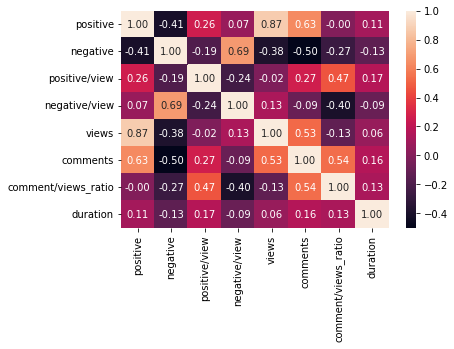

In [ ]:
sns.heatmap(data=num.corr(), annot=True, fmt='.2f');

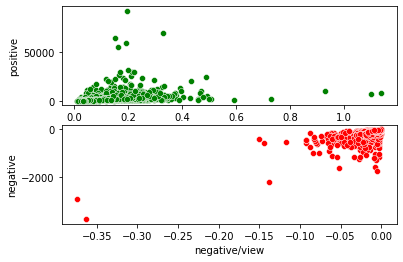

In [ ]:
#Relationship between top 10 most-positive/negative videos and good/bad quality
plt.subplot(211)
sns.scatterplot(data=ted, x='positive/view', y='positive', color='green')

plt.subplot(212)
sns.scatterplot(data=ted, x='negative/view', y='negative', color='red')


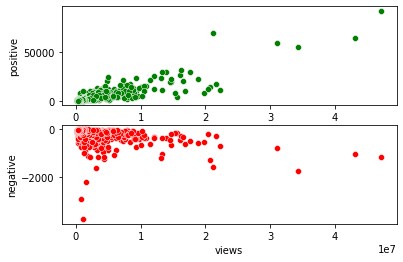

In [ ]:
plt.subplot(211)
sns.scatterplot(data=ted, x='views', y='positive', color='green')

plt.subplot(212)
sns.scatterplot(data=ted, x='views', y='negative', color='red')

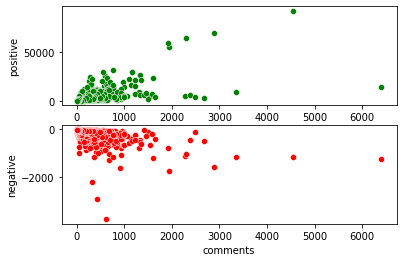

In [ ]:
#Relationship between comments and positive videos
plt.subplot(211)
sns.scatterplot(data=ted, x='comments', y='positive', color='green')

plt.subplot(212)
sns.scatterplot(data=ted, x='comments', y='negative',color='red')

# plt.subplot(212)
# sns.scatterplot(data=ted, x='comments', y='positive/view', color='green')

In [ ]:
#Relationship between comments and negative videos

# plt.subplot(212)
# sns.scatterplot(data=ted, x='comments', y='negative/view', color='red')

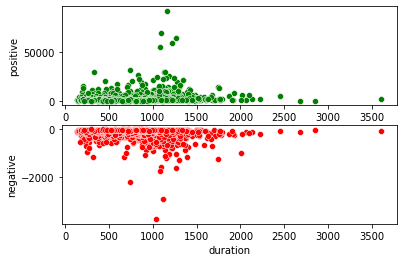

In [ ]:
plt.subplot(211)
sns.scatterplot(data=ted, x='duration', y='positive', color='green')

plt.subplot(212)
sns.scatterplot(data=ted, x='duration', y='negative', color='red')

From correlation chart, we can conclude that positive/view and negative/view has a slight positive correlation with the number of positive and negative
=> More views, more positive/negative

Also, comments have a positive correlation with positive ratings and negative correlation with negative ratings => More comments, more positivity and less negativity

However, the duration timestamp shows no correlation with the positive/negative ratings

#5.What topics appear the most in top good/bad quality? (Question 2)


## 5.1. Topics in good-quality videos

Good-quality videos are defined as videos having the positive/view in 60th quantile to 90th quantile





In [ ]:
good

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,total_ratings,positive/view,negative/view,comment/views_ratio
0,4553,1164,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,2006-02,2006-06,2006,Good morning. How are you?(Laughter)It's been ...,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93012,-1138,91874,0.196946,-0.002410,0.009641
2,124,1286,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,2006-02,2006-06,2006,"(Music: ""The Sound of Silence,"" Simon & Garfun...",964,60,183,45,78,27,395,166,104,230,54,146,142,230,2577,-351,2226,0.157490,-0.021451,0.007578
3,200,1116,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,2006-06-27 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,2006-02,2006-06,2006,If you're here today — and I'm very happy that...,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,3608,-156,3452,0.212542,-0.009190,0.011782
4,593,1190,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,2006-06-27 20:38:00,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,2006-02,2006-06,2006,"About 10 years ago, I took on the task to teac...",1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,25377,-310,25067,0.211372,-0.002582,0.004939
6,919,992,2006-02-24,31,Julia Sweeney,Julia Sweeney: Letting go of God,2006-07-10 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 477}...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987,2006-02,2006-07,2006,"On September 10, the morning of my seventh bir...",2484,277,320,477,193,72,226,316,225,311,61,308,290,438,5443,-780,4663,0.144377,-0.020690,0.024377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,235,1072,2017-04-25,32,His Holiness Pope Francis,His Holiness Pope Francis: Why the only future...,2017-04-26 01:01:05,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 1665}...",Bishop of Rome,"['Christianity', 'children', 'climate change',...",Why the only future worth building includes ev...,2679881,2017-04,2017-04,2017,[His Holiness Pope Francis Filmed in Vatican C...,21,1665,40,659,26,33,142,359,23,544,87,45,28,2229,5814,-110,5704,0.216950,-0.004105,0.008769
2367,105,1071,2017-04-24,26,Shah Rukh Khan,"Shah Rukh Khan: Thoughts on humanity, fame and...",2017-05-12 19:44:40,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 2626}...","Actor, producer, activist","['aging', 'art', 'communication', 'dance', 'en...","Thoughts on humanity, fame and love",4642478,2017-04,2017-05,2017,"Namaskar.I'm a movie star, I'm 51 years of age...",1020,2626,157,473,31,31,241,1259,30,151,327,120,15,3984,10388,-107,10281,0.223760,-0.002305,0.002262
2373,183,898,2017-04-24,20,Rutger Bregman,Rutger Bregman: Poverty isn't a lack of charac...,2017-05-22 15:06:14,"[{""id"": 10, ""name"": ""Inspiring"", ""count"": 950}...",Historian,"['capitalism', 'economics', 'inequality', 'mon...",Poverty isn't a lack of character; it's a lack...,1419314,2017-04,2017-

In [ ]:
raw=good['tags'][2]
letters= re.sub("[^a-zA-Z ]","",raw)
letters.lower()
letters


'computers entertainment interface design media music performance simplicity software technology'

In [ ]:
def clean_text(x):
  clean = re.sub("[^a-zA-Z ]", " ", x).lower()
  return clean



In [ ]:
good['tags_clean'] = good['tags'].apply(clean_text)
good['tags_clean'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         children    creativity    culture    dance  ...
2         computers    entertainment    interface desi...
3         macarthur grant    activism    business    c...
4         africa    asia    google    demo    economic...
6         christianity    god    atheism    comedy    ...
                              ...                        
2355      christianity    children    climate change  ...
2367      aging    art    communication    dance    en...
2373      capitalism    economics    inequality    mon...
2389      choice    fear    goal setting    humanity  ...
2454      happiness    humanity    personal growth    ...
Name: tags_clean, Length: 740, dtype: object

In [ ]:
result_dict = {}

def count_word(sentence):
    for word in sentence.split():
        if word not in result_dict:
            result_dict[word] = 1
        else:
            result_dict[word] += 1

In [ ]:
good['tags_clean'].apply(count_word)

0       None
2       None
3       None
4       None
6       None
        ... 
2355    None
2367    None
2373    None
2389    None
2454    None
Name: tags_clean, Length: 740, dtype: object

In [ ]:
result_dict

{'activism': 44,
 'addiction': 1,
 'adventure': 16,
 'advertising': 2,
 'africa': 28,
 'aging': 8,
 'agriculture': 11,
 'ai': 6,
 'aids': 3,
 'aircraft': 1,
 'alternative': 11,
 'alzheimer': 2,
 'america': 3,
 'ancient': 5,
 'and': 12,
 'animals': 38,
 'animation': 7,
 'anthropocene': 3,
 'anthropology': 9,
 'apes': 1,
 'archaeology': 3,
 'architecture': 16,
 'art': 80,
 'asia': 12,
 'astronomy': 11,
 'atheism': 1,
 'autism': 5,
 'bacteria': 4,
 'balance': 8,
 'bang': 3,
 'beauty': 18,
 'bees': 4,
 'behavioral': 4,
 'big': 17,
 'biodiversity': 21,
 'bioethics': 6,
 'biology': 62,
 'biomechanics': 5,
 'biomimicry': 6,
 'biotech': 15,
 'birds': 6,
 'blindness': 2,
 'blockchain': 1,
 'blue': 9,
 'body': 5,
 'books': 16,
 'botany': 5,
 'brain': 55,
 'brand': 1,
 'brazil': 5,
 'buddhism': 4,
 'building': 3,
 'bullying': 4,
 'business': 107,
 'cancer': 15,
 'capitalism': 1,
 'care': 34,
 'cars': 3,
 'change': 88,
 'charter': 2,
 'chemistry': 10,
 'children': 49,
 'china': 5,
 'choice': 15,
 

In [ ]:
pd.Series(result_dict).sort_values(ascending=False).head(15)

technology       217
science          204
global           202
issues           184
culture          174
design           144
health           125
business         107
tedx             102
entertainment     94
change            88
art               80
social            73
biology           62
education         59
dtype: int64

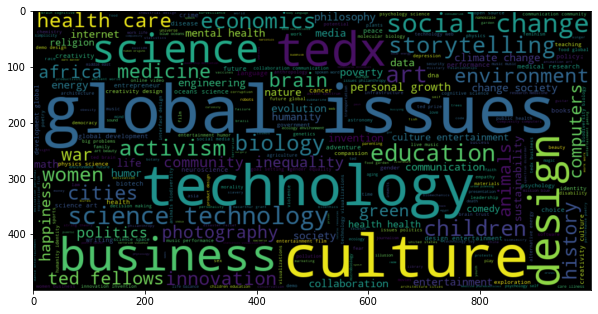

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)

# The syntax requires parameter as a body of text. 
text = ' '.join(good['tags_clean'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()

In [ ]:
tech= good[good['tags'].str.contains('technology')]
tech.groupby('Year')['tags'].count().to_frame()

tech.groupby('Year')['tags'].count().to_frame()
tech.groupby('Year_Month_publishing')['tags'].count().to_frame()
tech['speaker_occupation'].value_counts().head(10)

tech.groupby('Year_Month_publishing')['tags'].count().to_frame()

tech['speaker_occupation'].value_counts().head(10)

Inventor                 7
Artist                   4
Entrepreneur             4
Digital visionary        3
Oceanographer            3
Techno-illusionist       3
Researcher               3
Filmmaker                3
Roboticist               3
Social Media Theorist    3
Name: speaker_occupation, dtype: int64

In [ ]:
tech= good[good['tags'].str.contains('technology')]
tech.groupby('Year')['tags'].count().to_frame().reset_index()
# tech['speaker_occupation'].value_counts().head(10)

In [ ]:
tech.groupby('Year_Month_publishing')['tags'].count().to_frame().reset_index()
# tech['speaker_occupation'].value_counts().head(10).to_frame()

##5.2.Topics in bad-quality video

Good-quality videos are defined as videos having the negative/view in 10th quantile to 30th quantile

In [ ]:
bad

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,total_ratings,positive/view,negative/view,comment/views_ratio
1,265,977,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 544}, {""i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,2006-02,2006-06,2006,"Thank you so much, Chris. And it's truly a gre...",544,58,56,139,113,62,443,132,258,268,116,203,131,413,2630,-564,2066,0.082174,-0.017622,0.008280
2,124,1286,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,2006-02,2006-06,2006,"(Music: ""The Sound of Silence,"" Simon & Garfun...",964,60,183,45,78,27,395,166,104,230,54,146,142,230,2577,-351,2226,0.157490,-0.021451,0.007578
6,919,992,2006-02-24,31,Julia Sweeney,Julia Sweeney: Letting go of God,2006-07-10 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 477}...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987,2006-02,2006-07,2006,"On September 10, the morning of my seventh bir...",2484,277,320,477,193,72,226,316,225,311,61,308,290,438,5443,-780,4663,0.144377,-0.020690,0.024377
8,852,1485,2006-02-02,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,2006-07-18 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 562}...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,2567958,2006-02,2006-07,2006,It's wonderful to be back. I love this wonderf...,60,145,211,562,177,70,623,313,283,764,60,154,83,441,3616,-613,3003,0.140812,-0.023871,0.033178
14,99,1057,2006-02-23,25,Nicholas Negroponte,Nicholas Negroponte: One Laptop per Child,2006-08-01 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 83},...",Tech visionary,"['children', 'design', 'education', 'entrepren...",One Laptop per Child,358304,2006-02,2006-08,2006,I've been at MIT for 44 years. I went to TED I...,14,32,89,83,20,6,104,67,31,49,29,30,11,216,744,-68,676,0.207645,-0.018978,0.027630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,37,713,2016-10-21,15,Dan Bell,Dan Bell: Inside America's dead shopping malls,2017-03-17 15:51:46,"[{""id"": 1, ""name"": ""Beautiful"", ""count"": 83}, ...",Filmmaker,"['TEDx', 'art', 'capitalism', 'community', 'ex...",Inside America's dead shopping malls,1707855,2016-10,2017-03,2017,"In the last couple of years, I have produced w...",261,83,56,32,81,52,114,108,44,11,24,113,17,98,944,-194,750,0.055274,-0.011359,0.002166
2360,80,573,2017-04-24,16,Laura Galante,Laura Galante: How (and why) Russia hacked the...,2017-05-03 14:56:04,"[{""id"": 11, ""name"": ""Longwinded"", ""count"": 29}...",Cyberspace analyst,"['Internet', 'algorithm', 'communication', 'co...",How (and why) Russia hacked the US election,1132913,2017-04,2017-05,2017,Let's say you despise Western democracy. Democ...,10,26,28,65,29,37,245,81,107,114,33,50,45,57,816,-218,598,0.072027,-0.019242,0.007061
2375,54,768,2017-04-24,20,Anthony D. Romero,Anthony D. Romero: This is what democracy look...,2017-05-24 14:51:03,"[{""id"": 21, ""name"": ""Unconvincing"", ""count"": 6...","Attorney, public-interest activist","['United States', 'activism', 'communication',...",This is what democracy looks like,925733,2017-04,2017-05,2017,"Silicon Valley is obsessed with disruption, bu...",12,54,60,138,12,10,121,111,66,105,29,1

In [ ]:
text= bad['tags'][1]
letters= re.sub("[^a-zA-Z ]","",text)
letters.lower()
letters

'alternative energy cars climate change culture environment global issues science sustainability technology'

In [ ]:
def clean_text(bad):
  clean = re.sub("[^a-zA-Z ]", " ", bad).lower()
  return clean


In [ ]:
bad['clean_tags']= bad['tags'].apply(clean_text)
bad['clean_tags']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1         alternative energy    cars    climate change...
2         computers    entertainment    interface desi...
6         christianity    god    atheism    comedy    ...
8         god    ted brain trust    atheism    brain  ...
14        children    design    education    entrepren...
                              ...                        
2326      tedx    art    capitalism    community    ex...
2360      internet    algorithm    communication    co...
2375      united states    activism    communication  ...
2434      algorithm    data    inequality    marketing...
2457      business    capitalism    collaboration    e...
Name: clean_tags, Length: 493, dtype: object

In [ ]:
result_dict_bad = {}

def count_word(badd):
    for word in badd.split():
        if word not in result_dict_bad:
            result_dict_bad[word] = 1
        else:
            result_dict_bad[word] += 1

In [ ]:
bad['clean_tags'].apply(count_word)

1       None
2       None
6       None
8       None
14      None
        ... 
2326    None
2360    None
2375    None
2434    None
2457    None
Name: clean_tags, Length: 493, dtype: object

In [ ]:
result_dict_bad

{'activism': 23,
 'adventure': 6,
 'advertising': 2,
 'africa': 10,
 'aging': 7,
 'agriculture': 6,
 'ai': 9,
 'aids': 5,
 'aircraft': 2,
 'algorithm': 4,
 'alternative': 9,
 'america': 2,
 'ancient': 3,
 'and': 3,
 'animals': 8,
 'animation': 4,
 'anthropocene': 3,
 'anthropology': 5,
 'apes': 1,
 'archaeology': 1,
 'architecture': 15,
 'art': 44,
 'asia': 8,
 'asteroid': 1,
 'astrobiology': 2,
 'astronomy': 8,
 'atheism': 3,
 'bacteria': 3,
 'balance': 1,
 'bang': 1,
 'beauty': 7,
 'behavioral': 5,
 'big': 12,
 'biodiversity': 3,
 'bioethics': 4,
 'biology': 35,
 'biomechanics': 3,
 'biomimicry': 4,
 'biotech': 6,
 'birds': 2,
 'blockchain': 1,
 'blue': 3,
 'body': 1,
 'books': 11,
 'brain': 38,
 'brazil': 1,
 'buddhism': 2,
 'building': 2,
 'business': 94,
 'cancer': 6,
 'capitalism': 5,
 'care': 20,
 'cars': 8,
 'cello': 1,
 'change': 55,
 'charter': 4,
 'chemistry': 8,
 'children': 15,
 'china': 8,
 'choice': 5,
 'christianity': 1,
 'cities': 19,
 'climate': 16,
 'code': 3,
 'cogn

In [ ]:
pd.Series(result_dict_bad).sort_values(ascending=False).head(20)

technology       143
global           139
issues           124
culture          117
science          116
design           101
business          94
tedx              74
entertainment     72
health            56
change            55
economics         49
social            48
art               44
society           40
politics          38
brain             38
biology           35
women             34
ted               32
dtype: int64

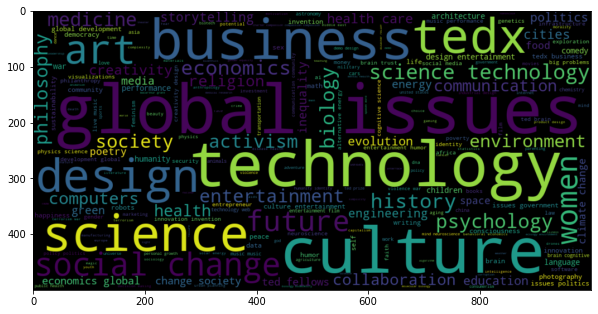

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)

# The syntax requires parameter as a body of text. 
text = ' '.join(bad['clean_tags'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()

• Top 15 topics including technology, science, global, issues, culture, design, health, business, tedx, entertainment, change, art, social, in which technology takes the lead in all topics

• Technology peak for 3 years from 2008-2011

• Good-quality videos have speakers whose occupations are: Inventor, Entrepreneur, Artist

• Top sub-topics associated with technology are design along with science


#6.What emotional rating represents TED videos with positive and negative ratings? (Question 3)

## 6.1.Emotion representing TED videos with positive ratings


In [ ]:
g= good.groupby('Year_Month_publishing')['Beautiful','Inspiring','Funny','Fascinating','Ingenious','Jaw-dropping','Courageous','Persuasive','Informative','OK'].sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
g

,Beautiful,Inspiring,Funny,Fascinating,Ingenious,Jaw-dropping,Courageous,Persuasive,Informative,OK
Year_Month_publishing,,,,,,,,,,
2006-06,5866,29117,22058,15485,9563,8459,4376,13936,13554,1653
2006-07,398,1247,2507,505,598,147,742,513,446,373
2006-08,568,1050,167,1206,1288,4765,196,148,636,286
2006-09,1285,5166,3430,5998,2789,1232,1253,3956,5343,901
2006-10,133,895,228,1168,576,489,521,1452,813,220
...,...,...,...,...,...,...,...,...,...,...
2017-03,438,1419,364,249,47,47,781,357,297,57
2017-04,1665,2229,21,359,40,87,659,544,142,45
2017-05,2697,4934,1060,1571,291,454,677,647,771,139


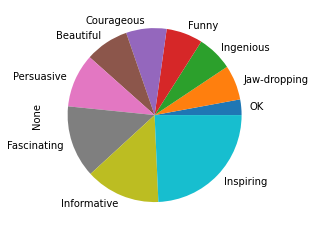

In [ ]:
g[['Beautiful','Inspiring','Funny','Fascinating','Ingenious','Jaw-dropping','Courageous','Persuasive','Informative','OK']].sum().sort_values().plot(kind='pie')


As from the chart, inspring leads all the positivity emotions

In [ ]:
good_inspiring['speaker_occupation'].value_counts().to_frame().head(10)

,speaker_occupation
Writer,15
Entrepreneur,11
Designer,11
Educator,11
Inventor,11
Journalist,10
Filmmaker,9
Photographer,9
Psychologist,8
Artist,8


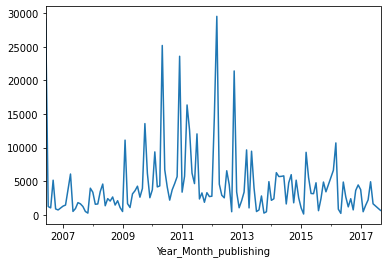

In [ ]:
g['Inspiring'].plot(kind='line')

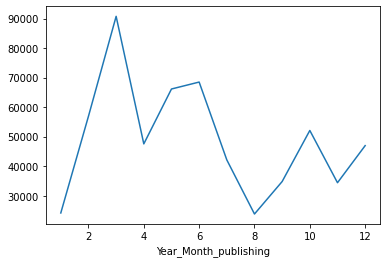

In [ ]:
good.groupby(good['Year_Month_publishing'].dt.month)['Inspiring'].sum().plot(kind='line')


In [ ]:
good_inspiring= good.sort_values('Inspiring',ascending=False)


In [ ]:
top5_inspiring= good.sort_values('Inspiring', ascending=False).head(5)
top5_inspiring

,comments,duration,film_date,languages,main_speaker,name,published_date,ratings,speaker_occupation,tags,title,views,Year_Month_filming,Year_Month_publishing,Year,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,positive,negative,total_ratings,positive/view,negative/view,comment/views_ratio,tags_clean
0,4553,1164,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,2006-02,2006-06,2006,Good morning. How are you?(Laughter)It's been ...,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93012,-1138,91874,0.196946,-0.002410,0.009641,children creativity culture dance ...
649,1930,1084,2009-09-17,45,Simon Sinek,Simon Sinek: How great leaders inspire action,2010-05-04 09:31:00,"[{""id"": 21, ""name"": ""Unconvincing"", ""count"": 9...",Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",How great leaders inspire action,34309432,2009-09,2010-05,2010,How do you explain when things don't go as we ...,390,1640,3413,1161,390,112,6600,7440,930,8845,2659,1341,294,21564,55983,-1726,54257,0.163171,-0.005031,0.005625,tedx business entrepreneur leadersh...
800,1927,1219,2010-06-06,52,Brené Brown,Brené Brown: The power of vulnerability,2010-12-23 14:45:00,"[{""id"": 10, ""name"": ""Inspiring"", ""count"": 2144...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,31168150,2010-06,2010-12,2010,"So, I'll start with this: a couple years ago, ...",5225,7942,1094,8280,283,155,4561,4638,233,3510,2100,500,113,21444,59527,-784,58743,0.190987,-0.002515,0.006183,tedx communication culture depressi...
1268,2290,1262,2012-06-26,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,2012-10-01 15:00:08,"[{""id"": 23, ""name"": ""Jaw-dropping"", ""count"": 3...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,43155405,2012-06,2012-10,2012,So I want to start by offering you a free no-t...,938,3232,1428,6305,338,197,9787,11111,335,6217,3586,1129,155,21210,65278,-1025,64253,0.151263,-0.002375,0.005306,body language brain business psycho...
1072,754,740,2011-05-11,46,Shawn Achor,Shawn Achor: The happy secret to better work,2012-02-01 16:09:38,"[{""id"": 10, ""name"": ""Inspiring"", ""count"": 1121...",Psychologist,"['TEDx', 'brain', 'business', 'cognitive scien...",The happy secret to better work,16209727,2011-05,2012-02,2012,When I was seven years old and my sister was j...,7315,1007,1162,471,78,61,3886,2529,82,3426,683,206,61,11213,31980,-282,31698,0.197289,-0.001740,0.004652,tedx brain business cognitive scien...


In [ ]:
good.groupby('Year')['Inspiring'].sum().reset_index()

,Year,Inspiring
0,2006,38214
1,2007,19829
2,2008,27874
3,2009,54313
4,2010,97571
5,2011,74623
6,2012,94343
7,2013,39485
8,2014,50044
9,2015,38564


## 6.2.Emotion representing TED videos with negative ratings

In [ ]:
bad['Year_Month_publishing'].unique()
b=bad.groupby('Year_Month_publishing')['Longwinded','Confusing','Obnoxious','Unconvincing'].sum()
b


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Longwinded,Confusing,Obnoxious,Unconvincing
Year_Month_publishing,,,,
2006-06,191,89,273,362
2006-07,370,142,373,508
2006-08,286,209,250,168
2006-09,45,42,21,49
2006-10,164,71,110,123
...,...,...,...,...
2017-02,44,22,92,123
2017-03,81,52,17,44
2017-05,41,47,109,173


In [ ]:
b[['Longwinded','Confusing','Obnoxious','Unconvincing']].sum().to_frame()

,0
Longwinded,23810
Confusing,14038
Obnoxious,17212
Unconvincing,39293


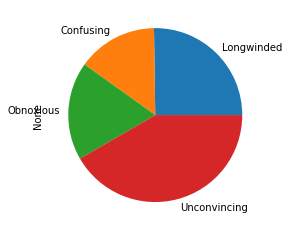

In [ ]:
b[['Longwinded','Confusing','Obnoxious','Unconvincing']].sum().plot(kind='pie')


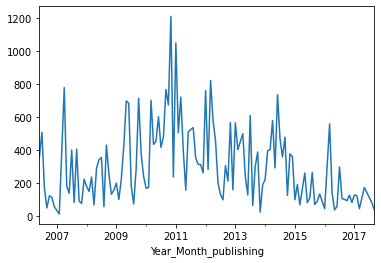

In [ ]:
bad.groupby('Year_Month_publishing')['Unconvincing'].sum().plot(kind='line')

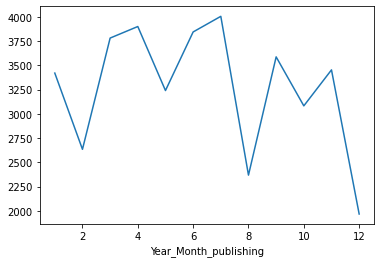

In [ ]:
bad.groupby(bad['Year_Month_publishing'].dt.month)['Unconvincing'].sum().plot(kind='line')

In [ ]:
bad['speaker_occupation'].value_counts().to_frame()

,speaker_occupation
Designer,13
Psychologist,11
Writer,8
Journalist,8
Economist,7
...,...
General,1
American,1
Polymorphic playwright,1
Micro-sculptor,1


• Top emotion ruling positive videos is inspiring, meanwhile top emotion ruling negative video is unconvincing

• Both positive and negative videos whose speaker's occupation are writer, designer

• Inspiring: 2010-2012 (March) as peak time

• Unconvincing: 2010 (July) as peak time


#7.Export to spreadsheet and create reports in Google Data Studio

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Create a new Google Spreadsheets
sh = gc.create('HH_overview')

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1FXil3LAHiDk3tYfScXpd_eDq6G41GhlEAX7C4pIaLsY/edit#gid=0
                   Key is 1FXil3LAHiDk3tYfScXpd_eDq6G41GhlEAX7C4pIaLsY
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
# export_data_to_new_sheet('1Z0ZbyhxAEoki5iIc-0Y-nP73EUIz0VBsYtxTpUxIdtI',  'viewspositive',ted[['views','positive']])
# export_data_to_new_sheet('1Z0ZbyhxAEoki5iIc-0Y-nP73EUIz0VBsYtxTpUxIdtI',  'viewsnegative',ted[['views','negative']])
# export_data_to_new_sheet('1QCFf2WDSaLAsnfDSuOOM5MTVVp5JdIIp3vYWAC5eO3M', 'commentspositive',ted[['comments','positive']])
# export_data_to_new_sheet('1QCFf2WDSaLAsnfDSuOOM5MTVVp5JdIIp3vYWAC5eO3M', 'commentsnegative',ted[['comments','negative']])
# export_data_to_new_sheet('1QCFf2WDSaLAsnfDSuOOM5MTVVp5JdIIp3vYWAC5eO3M', 'ng',ted[['duration','positive']])
# export_data_to_new_sheet('1QCFf2WDSaLAsnfDSuOOM5MTVVp5JdIIp3vYWAC5eO3M', 'ps',ted[['duration','negative']])
# export_data_to_new_sheet('1sDbYl2zElbQXsZgJP5mxK5e4ZOJGMcK_GnyRHHAzsx8', 'Word',pd.Series(result_dict).sort_values(ascending=False).head(20).to_frame())
# export_data_to_new_sheet('1sDbYl2zElbQXsZgJP5mxK5e4ZOJGMcK_GnyRHHAzsx8', 'Badword',pd.Series(result_dict_bad).sort_values(ascending=False).head(20).to_frame())
# export_data_to_new_sheet('1s-NP2fml3oUFkd643t4bcdeScad2CgAGbyVcfTz8aaQ', 'Badword',tech.groupby('Year')['tags'].count().to_frame())
# export_data_to_new_sheet('1s-NP2fml3oUFkd643t4bcdeScad2CgAGbyVcfTz8aaQ', 'time',tech.groupby('Year')['tags'].count().to_frame().reset_index())
# export_data_to_new_sheet('1s-NP2fml3oUFkd643t4bcdeScad2CgAGbyVcfTz8aaQ', 'period',tech.groupby('Year_Month_publishing')['tags'].count().to_frame().reset_index())
# export_data_to_new_sheet('1YvK-SnG36QBS9vCOzalFSOUwC_DUZ5ZZF7roRwEc5P8', '2010_EMOTION',good_2010.groupby('Year_Month_publishing')['Beautiful','Inspiring','Funny','Fascinating','Ingenious','Jaw-dropping','Courageous','Persuasive','Informative','OK'].sum().reset_index())
# export_data_to_new_sheet('1YvK-SnG36QBS9vCOzalFSOUwC_DUZ5ZZF7roRwEc5P8', 'months',good.groupby(good['Year_Month_publishing'].dt.month)['Inspiring'].sum().reset_index())
# export_data_to_new_sheet('1FXil3LAHiDk3tYfScXpd_eDq6G41GhlEAX7C4pIaLsY', 'unconvincing',bad.groupby('Year_Month_publishing')['Unconvincing'].sum().reset_index())
# export_data_to_new_sheet('1FXil3LAHiDk3tYfScXpd_eDq6G41GhlEAX7C4pIaLsY', 'inspiring_transcript',pd.Series(result_dict_transcript).sort_values(ascending=False).reset_index())
export_data_to_new_sheet('1FXil3LAHiDk3tYfScXpd_eDq6G41GhlEAX7C4pIaLsY', 'unconvincing_transcript',pd.Series(result_dict_transcript).sort_values(ascending=False).reset_index())


In [ ]:
#Link to Google Data Studio: 
https://datastudio.google.com/u/0/reporting/4333faa2-8bed-4740-be71-bef16a2c2753/page/p_3nu0n867qc
